In [1]:
import pandas as pd
import numpy as np

# Integrantes


In [2]:
members = {
    'RM': ['552226', '98676', '551905', '550782'],
    'Nome': ['Bruno Francisco Brito de Paula', 'Edward de Lima Silva',
             'Gabriel Barroso de Assis França','Kayque Lima Nunes'],
}
group = pd.DataFrame(members)
group.set_index('RM', inplace=True)
group['Turma'] = '2TDSPW'
group

,Nome,Turma
RM,,
552226,Bruno Francisco Brito de Paula,2TDSPW
98676,Edward de Lima Silva,2TDSPW
551905,Gabriel Barroso de Assis França,2TDSPW
550782,Kayque Lima Nunes,2TDSPW


# Houselhold Power Consuption Dataset

Disponível em: https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption.

O dataset contém medições de consumo de energia elétrica em uma residência com uma taxa de amostragem de um minuto ao longo de um período de quase 4 anos.

## Colunas

O dataset contém nove colunas.


Date: data em dd/mm/yyyy

Time: hora da medição

Global Active Power: potência ativa global média por minuto da residência (em quilowatt)

Global Reactive Power: potência reativa global média por minuto da residência (em quilowatt)

Voltage : voltagem média por minuto (em volts)

Global Intensity: intensidade de corrente global média por minuto da residência (em ampere)

Sub Metering 1: submedição de energia No. 1 (em watt-hora de energia ativa). Corresponde à cozinha, contendo principalmente uma máquina de lavar louça, um forno e um micro-ondas (os fogões não são elétricos, mas alimentados a gás).

Sub Metering 2: submedição de energia No. 2 (em watt-hora de energia ativa). Corresponde à lavanderia, contendo uma máquina de lavar roupa, uma secadora, uma geladeira e uma luz.

Sub Metering 3: submedição de energia No. 3 (em watt-hora de energia ativa). Corresponde a um aquecedor de água elétrico e um ar-condicionado.

## Análise Estatística e Exploratória

Apresentação dos dados.

In [3]:
power = pd.read_csv('/content/household_power_consumption.txt', sep=';', header=0)
power.head()

<ipython-input-3-e1057654dcd3>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  power = pd.read_csv('/content/household_power_consumption.txt', sep=';', header=0)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
power.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [5]:
# Valores nulos
power.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [6]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


## Limpeza dos dados

In [7]:
power = power.dropna()

## Método de Elbow
Encontrando o número ideal de clusteres

In [8]:
X = power[['Global_active_power', 'Sub_metering_2']]
X.head()

,Global_active_power,Sub_metering_2
0,4.216,1.000
1,5.360,1.000
2,5.374,2.000
3,5.388,1.000
4,3.666,1.000


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

## Plotando Gráfico da Curva

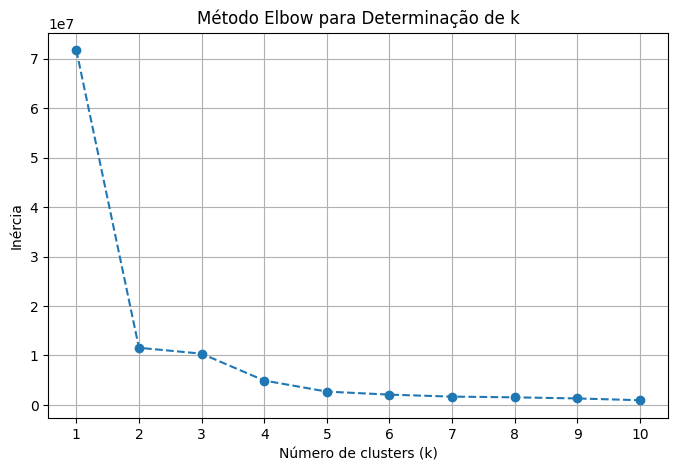

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.title('Método Elbow para Determinação de k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

## Aplicando KMeans

In [11]:
valor_ideal_de_k = 3
kmeans = KMeans(n_clusters=valor_ideal_de_k, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

## Avaliando

In [ ]:
clusters = kmeans.predict(X)

silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score médio: {silhouette_avg}")